In [116]:
import pandas as pd

Loading dataset

In [117]:
# Loading the data
Aviation_data = pd.read_csv('AviationData.csv', encoding=('latin-1'))
Aviation_data.head()

c:\Users\CRIS\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Data Preparation

In [118]:
# Finding out basic information about the dataset
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [119]:
# Checking the number of rows and columns in the dataset
Aviation_data.shape

(88889, 31)

In [120]:
# Checking for statistical summary of the data
Aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [121]:
# Checking for the summary of the dataset other than the numerical data
Aviation_data.describe(include=['object', 'bool'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,WPR22LA143,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


Data Cleaning

In [122]:
# Checking for duplicates in the dataset
Aviation_data.duplicated().sum()

0

The dataset does not contain any duplicates

In [123]:
# Checking for missing values in the dataset
Aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [124]:
# Checking for the number of unique values in every column
Aviation_data.nunique()

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [125]:
# Changing column names to lower cases and separated by '_'
Aviation_data.columns = Aviation_data.columns.str.replace('.', '_', regex=True).str.lower()
Aviation_data.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [126]:
# Checking for number of unique vales in the investigation type column
Aviation_data['investigation_type'].value_counts()

Accident    85015
Incident     3874
Name: investigation_type, dtype: int64

In [127]:
# Keeping rows with accident investigation  type
Aviation_data = Aviation_data[Aviation_data['investigation_type'] == 'Accident']
Aviation_data

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [128]:
Aviation_data.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

Dealing with missing values

In [129]:
# Dropping columns with too many missing values
columns_to_drop = [
    "event_id", "publication_date", "airport_code", "schedule",
    "location", "investigation_type", "far_description", "report_status", "longitude", "latitude", "air_carrier", "aircraft_category", "airport_name", "injury_severity", "aircraft_damage"
]
Aviation_data = Aviation_data.drop(columns=columns_to_drop)
print(Aviation_data.shape)

(85015, 16)


In [130]:
# filling missing values with unknown for the broad of phase flight
Aviation_data['broad_phase_of_flight'].fillna('Unkown', inplace=True)

In [131]:
# Filling missing values with zero
injury_columns = ["total_serious_injuries", "total_minor_injuries", "total_fatal_injuries"]
Aviation_data[injury_columns] = Aviation_data[injury_columns].fillna(0)

In [132]:
# Filling missing values with mode
Aviation_data["engine_type"].fillna(Aviation_data["engine_type"].mode()[0], inplace=True)

In [133]:
# Filiing missing values in the purpose of flight with unknown
Aviation_data['purpose_of_flight'].fillna('Unknown', inplace=True)

In [134]:
# Filling missing values in the weather condition with the mode 0
Aviation_data["weather_condition"].fillna(Aviation_data["weather_condition"].mode()[0], inplace=True)

In [135]:
# Dropping rows with missing reg number
Aviation_data = Aviation_data.dropna(subset=['registration_number'])

In [136]:
# Filling missing values in the country column with unknown
Aviation_data['country'].fillna('Unknown', inplace=True)

In [137]:
# dropping rows with missing values on make and model
Aviation_data = Aviation_data.dropna(subset =['make', 'model'])

In [138]:
# Filling missing values on the amateur built column
Aviation_data["amateur_built"].fillna("No", inplace=True)

In [139]:
# Filling values in the number of engines column with the mode
Aviation_data["number_of_engines"].fillna(Aviation_data["number_of_engines"].mode()[0], inplace=True)

In [140]:
# Filling missing values on the total uninjured column with zero
Aviation_data['total_uninjured'].fillna(0, inplace=True)

In [141]:
Aviation_data.isna().sum()

accident_number           0
event_date                0
country                   0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [142]:
# Saving the cleaned dataset as csv
Aviation_data.to_csv('cleaned_aviation_data.csv', index=False)

Data analysis and visualizations

In [143]:
# Finding models with most fatalities
riskiest_models = Aviation_data.groupby("model")["total_fatal_injuries"].sum().sort_values(ascending=False)

# Display the top 10 riskiest models
print(riskiest_models.head(10))

model
737          1348.0
777 - 206     534.0
172N          419.0
152           386.0
A321          381.0
172           372.0
PA-28-181     358.0
A36           337.0
A330          331.0
PA-28-140     313.0
Name: total_fatal_injuries, dtype: float64


Text(0.5, 1.0, 'Top 10 Riskiest Aircraft Models')

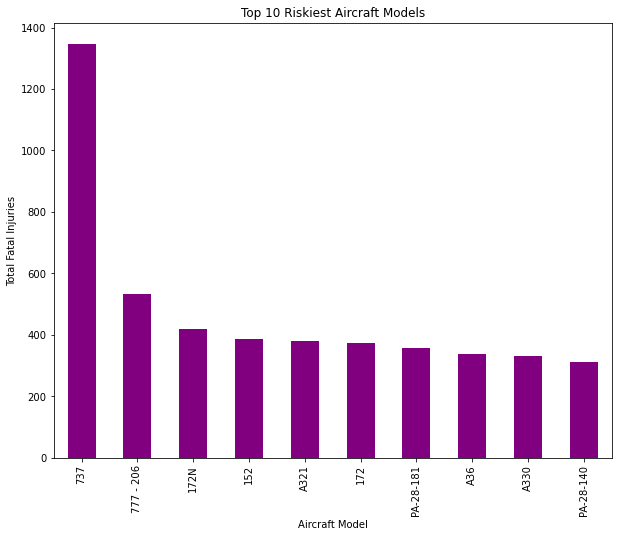

In [144]:
# Plot of models with most fatalities
import matplotlib.pyplot as plt

most_risky_models = riskiest_models.head(10)

plt.figure(figsize=(10,8))
most_risky_models.plot(kind="bar", color="purple")

# Labels and title
plt.xlabel("Aircraft Model")
plt.ylabel("Total Fatal Injuries")
plt.title("Top 10 Riskiest Aircraft Models")

In [145]:
# safest aircraft models
fatalities_per_model = Aviation_data.groupby("model")["total_fatal_injuries"].sum().sort_values()
print(fatalities_per_model.head(10))

model
&GCBC        0.0
M-5 235C     0.0
M-4S         0.0
M-4C         0.0
M-4-2205     0.0
M-4-210      0.0
M-4-180V     0.0
M-4-180C     0.0
M-2O         0.0
M-24 PLUS    0.0
Name: total_fatal_injuries, dtype: float64


In [146]:
# Safest and least safe aircrafts by engine type
engine_risk = Aviation_data.groupby('engine_type')['total_fatal_injuries'].sum()

safest_engines = engine_risk.sort_values(ascending=True).head(10)
riskiest_engines = engine_risk.sort_values(ascending=False).head(10)

print("Safest Engine Types:\n", safest_engines)
print("\nRiskiest Engine Types:\n", riskiest_engines)

Safest Engine Types:
 engine_type
LR                  0.0
NONE                0.0
UNK                 0.0
Hybrid Rocket       1.0
None                1.0
Electric            2.0
Turbo Jet         674.0
Unknown           817.0
Turbo Shaft      1683.0
Turbo Prop       2544.0
Name: total_fatal_injuries, dtype: float64

Riskiest Engine Types:
 engine_type
Reciprocating    31516.0
Turbo Fan         4217.0
Turbo Prop        2544.0
Turbo Shaft       1683.0
Unknown            817.0
Turbo Jet          674.0
Electric             2.0
None                 1.0
Hybrid Rocket        1.0
UNK                  0.0
Name: total_fatal_injuries, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Electric'),
  Text(1, 0, 'Hybrid Rocket'),
  Text(2, 0, 'LR'),
  Text(3, 0, 'NONE'),
  Text(4, 0, 'None'),
  Text(5, 0, 'Reciprocating'),
  Text(6, 0, 'Turbo Fan'),
  Text(7, 0, 'Turbo Jet'),
  Text(8, 0, 'Turbo Prop'),
  Text(9, 0, 'Turbo Shaft'),
  Text(10, 0, 'UNK'),
  Text(11, 0, 'Unknown')])

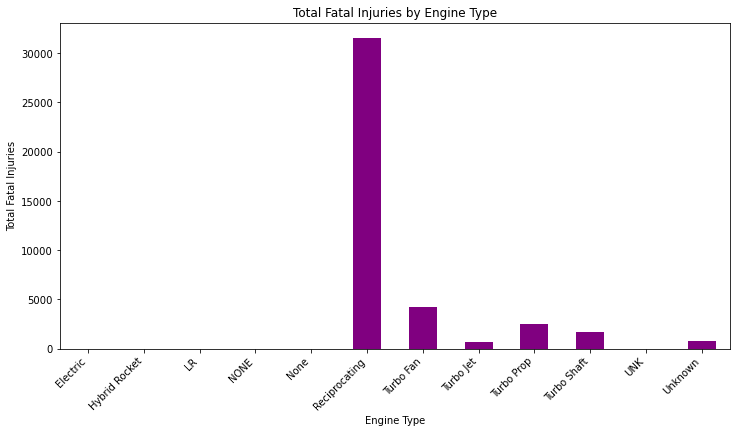

In [147]:
# Plot of all engine types
plt.figure(figsize=(12, 6))
engine_risk.plot(kind="bar", color="purple")

# Labels and title
plt.xlabel("Engine Type")
plt.ylabel("Total Fatal Injuries")
plt.title("Total Fatal Injuries by Engine Type")
plt.xticks(rotation=45, ha="right")

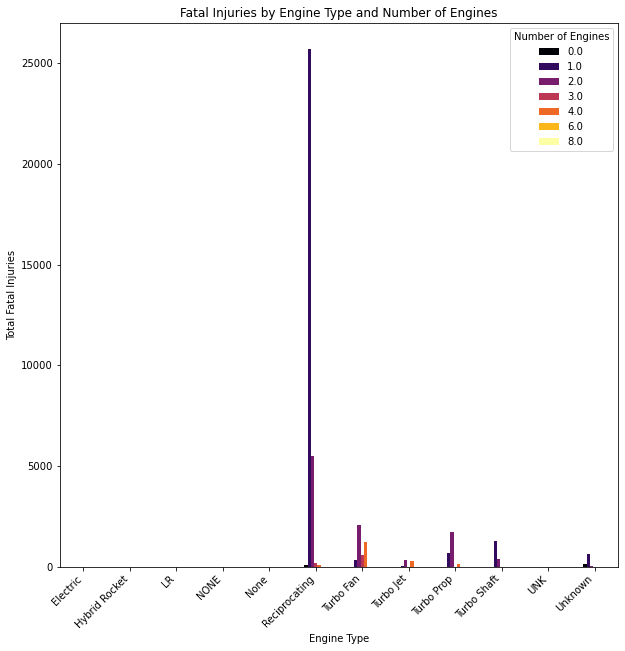

In [148]:
engine_safety = Aviation_data.groupby(['engine_type', 'number_of_engines'])['total_fatal_injuries'].sum().unstack()
engine_safety.plot(kind="bar", figsize=(10, 10), colormap="inferno")

plt.xlabel("Engine Type")
plt.ylabel("Total Fatal Injuries")
plt.title("Fatal Injuries by Engine Type and Number of Engines")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Number of Engines")

plt.show()

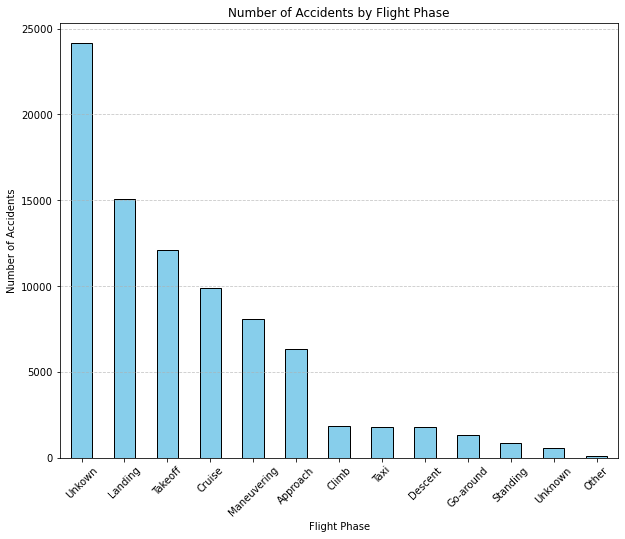

In [149]:
# Finding number of accidents in each flight phase
plt.figure(figsize=(10, 8))
flight_phase_accidents.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Accidents by Flight Phase")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

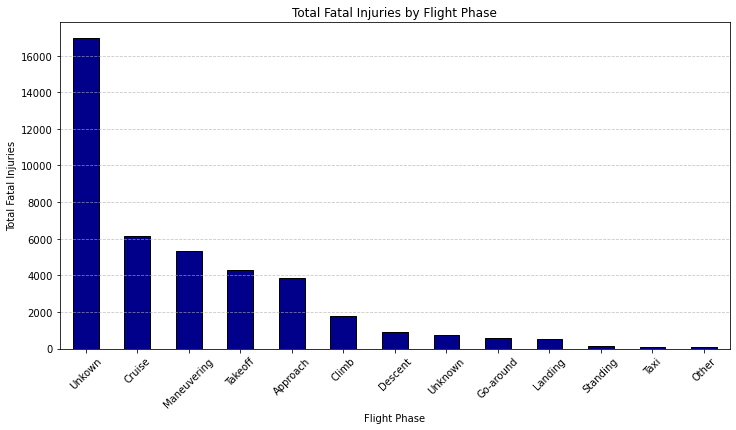

In [150]:
# Fatality rates for the flight phase
Phase_fatalities = Aviation_data.groupby("broad_phase_of_flight")["total_fatal_injuries"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
Phase_fatalities.plot(kind="bar", color="darkblue", edgecolor="black")
plt.title("Total Fatal Injuries by Flight Phase")
plt.xlabel("Flight Phase")
plt.ylabel("Total Fatal Injuries")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [151]:
# Finding fatality rate in each flight phase
fatality_rate = (flight_phase_accidents / Phase_fatalities)
fatality_rate = fatality_rate.sort_values(ascending=False)

fatality_rate

Landing        29.147002
Taxi           18.010101
Standing        5.509677
Takeoff         2.817527
Go-around       2.279387
Descent         1.946331
Approach        1.651017
Cruise          1.605677
Maneuvering     1.523031
Unkown          1.422721
Other           1.305882
Climb           1.050597
Unknown         0.715621
dtype: float64

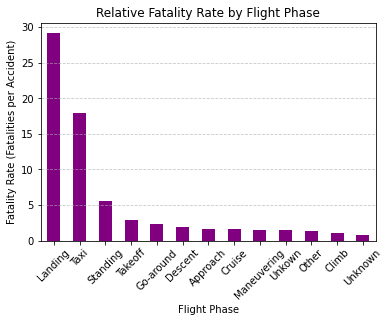

In [152]:
# Plot for the fatality rate
fatality_rate.plot(kind="bar", color="purple")
plt.title("Relative Fatality Rate by Flight Phase")
plt.xlabel("Flight Phase")
plt.ylabel("Fatality Rate (Fatalities per Accident)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

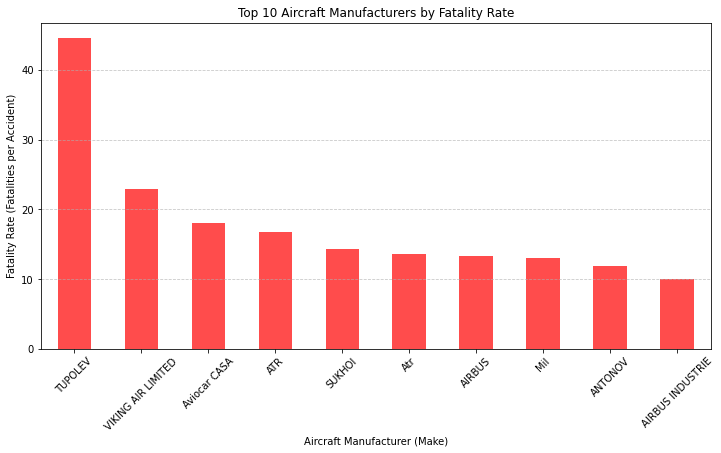

In [153]:
# Fatality rate by make
accidents_by_make = Aviation_data.groupby('make')['accident_number'].count()
fatalities_by_make = Aviation_data.groupby('make')['total_fatal_injuries'].sum()

fatality_rate_by_make = (fatalities_by_make / (accidents_by_make + 1e-9)).sort_values(ascending=False)

# Plot the top 10 makes with the highest fatality rates
plt.figure(figsize=(12,6))
fatality_rate_by_make.head(10).plot(kind='bar', color='red', alpha=0.7)
plt.title("Top 10 Aircraft Manufacturers by Fatality Rate")
plt.xlabel("Aircraft Manufacturer (Make)")
plt.ylabel("Fatality Rate (Fatalities per Accident)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [154]:
Aviation_data.columns

Index(['accident_number', 'event_date', 'country', 'registration_number',
       'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')